## 🎯 Introduction: Preparing the Titanic Dataset for Linear Regression

In this notebook, we will walk through the **end-to-end preprocessing and modeling pipeline** to train a **Linear Regression** model on the Titanic dataset. Our goal is to prepare the data in a clean, consistent, and ML-friendly format that works well for a linear model.

> 🧠 Note: Steps are not always followed in strict order — some may overlap, repeat, or depend on the dataset's unique structure.

---

### 🧪 Key Steps in the Pipeline:

- **Load the dataset**  
  Import the Titanic dataset using `pandas`.

- **Inspect the dataset**  
  Check shape, column types, null values, and preview initial rows.

- **Handle missing values**  
  Use techniques like filling (mean/median/mode) or flagging missing entries.

- **Remove duplicates**  
  Ensure data integrity by dropping exact duplicate rows if any.

- **Fix incorrect data types**  
  Convert columns to proper formats (e.g., object → numeric, date, category).

- **Encode categorical variables**  
  Use label encoding or one-hot encoding depending on the variable type and model requirement.

- **Feature engineering**  
  Derive new useful features such as extracting deck from cabin, family size, etc.

- **Handle outliers** *(optional)*  
  Detect and optionally remove or treat extreme values in numerical features.

- **Normalize / Scale numerical features**  
  Especially important for Linear Regression to stabilize feature impact.

- **Split the dataset**  
  Divide into training and testing sets (optionally validation too).

- **Balance the dataset** *(optional for classification)*  
  Apply SMOTE or class weights if doing classification (e.g., survival prediction).

- **Train the model**  
  Fit a linear regression model on the cleaned training data.

- **Tune hyperparameters (if any)**  
  Although linear regression has few, regularization (Ridge/Lasso) may be explored.

- **Evaluate performance**  
  Measure accuracy, RMSE, or R² depending on the task type.

---

> 💡 Titanic is typically used for classification (survived vs not), but this workflow can also demonstrate regression-style preprocessing or be extended to logistic regression.


In [599]:
import pandas as pd
# reason why we dont import scikit-learn bc 
#1. its a package
#2. (-) hiphens are not allowed in python  in library names
# so instead we import the specific function we need , can aslo do import sklearn
from sklearn.model_selection import train_test_split

In [600]:
df = pd.read_csv('/home/aman/Desktop/datascience/dataset/Titanic-Dataset.csv')

# inspection 

In [601]:
# inspecting the data
# what data is ?
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [602]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [603]:
# removing unwanted data like ,sibsp , ticket , fare ,name,pasanger id 

# df.drop(["PassengerId","Name","SibSp","Ticket","Fare"],axis=1)


#note -> if u run the code above more than once (in same working instance) , this throws error  KeyError: "['PassengerId', 'Name', 'SibSp', 'Ticket', 'Fare'] not found in axis" : bc its already removed that rows so running code again throws the error , so in order to remove that Keyerror case 
df =df.drop(["PassengerId","Name","SibSp","Ticket","Fare"],axis=1,errors="ignore")

In [604]:
print(df.shape)
print("----------------------------------------------")
print(df.isnull().sum()) # checking for null values in each column
print("----------------------------------------------")




(891, 7)
----------------------------------------------
Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Cabin       687
Embarked      2
dtype: int64
----------------------------------------------


In [605]:
# removing duplicate values 
# inoder to find duplicate values Returns True for every row that is a duplicate, otherwise False:
# to remove duplicates, use the drop_duplicates() method.

print(df.duplicated())

# df = df.drop_duplicates() # or 
df.drop_duplicates(inplace=True) # The (inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888     True
889    False
890    False
Length: 891, dtype: bool


# handling missing values
1. removing data itself (easy)
2. imputation (filling missing values) -> 
`constant`
`mean,meadian,mode`
`forwardfill,backwaedfill`
3. model based filling -> `KNN` `REGRESSION`


In [606]:
# REMOVING MISSING VALUES
df1 = df.dropna() # removing rows with missing values
print(df1.isnull().sum()) # checking for null values in each column after removing rows
print(df1.shape)
# so much data is lost , here in this case 

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Cabin       0
Embarked    0
dtype: int64
(181, 7)


In [607]:
# imputation
# filling missing values with mean
df2 = df.fillna(df['Age'].mean()) # filling missing values with mean
print(df2.isnull().sum()) # checking for null values in each column after filling missing values
print(df2.shape) #DATA IS MAINTAINED
df3=df.fillna(df['Age'].median())
print('----------------------------------------------')
print(df3.isnull().sum()) # checking for null values in each column after filling missing values
print(df3.shape) #DATA IS MAINTAINED

# so for mode

# forward fill and backward fill
df4=df.fillna(method='ffill') # forward fill
print('----------------------------------------------')
print(df4.isnull().sum()) # checking for null values in each column after filling missing values
print(df4.shape) #DATA IS MAINTAINED




df5=df.fillna(method='bfill') # backward fill
print('----------------------------------------------')
print(df5.isnull().sum()) # checking for null values in each column after filling missing values
print(df5.shape) #DATA IS MAINTAINED


#note cabin have 1 missing value , still left bc its the first row 

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Cabin       0
Embarked    0
dtype: int64
(570, 7)
----------------------------------------------
Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Cabin       0
Embarked    0
dtype: int64
(570, 7)
----------------------------------------------
Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Cabin       1
Embarked    0
dtype: int64
(570, 7)
----------------------------------------------
Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Cabin       1
Embarked    0
dtype: int64
(570, 7)


/tmp/ipykernel_139448/2120702200.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4=df.fillna(method='ffill') # forward fill
/tmp/ipykernel_139448/2120702200.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df5=df.fillna(method='bfill') # backward fill


## knn imputer 

he KNN Imputer is a method used to fill missing values in a dataset using the K-Nearest Neighbors approach. It's available in scikit-learn (sklearn.impute.KNNImputer). Instead of using simple strategies like mean or median imputation, KNN Imputer looks at the nearest data points (neighbors) and fills missing values based on their values.
🔧 How It Works

For each missing value in a feature:

    It finds the k-nearest samples (rows) that have a value for that feature.

    It uses the average (or weighted average) of those neighbors to impute the missing value.
        KNNImputer(...) creates an instance of the KNNImputer class from sklearn.impute.

    imputer is just a variable name that holds this instance.

    This instance has methods like .fit(), .transform(), and .fit_transform() that are used to impute missing values.

So technically:

    🔹 imputer is an object of the KNNImputer class that you use to perform K-Nearest Neighbors-based imputation on a dataset.




### .fit()



imputer.fit(data)

    Learns from the data.

    In KNNImputer, this means it calculates distances between rows, finds neighbors, and prepares itself to do imputation.

    But it does NOT actually change or return the data yet.

💬 Think of it as:

    “Hey imputer, look at this data and understand how it’s structured.”

###  .transform()

imputed_data = imputer.transform(data)

    Uses what was learned in .fit() to actually fill in the missing values.

    It gives you back a version of the dataset where NaNs are replaced.

💬 Think of it as:

    “Okay, now apply what you learned and fix the missing values.”
###  .fit_transform()

imputed_data = imputer.fit_transform(data)

    Does both steps in one line:

        First .fit(data) to learn

        Then .transform(data) to return the imputed data
## important point knnimputer returns numpy array not data frame so u have to convert it into data frame 

In [608]:
#model based filling
#KNN imputation
from sklearn.impute import KNNImputer
#so from sklearn lib , importing knnimputer class , creating a instance from that class knn imputer with n_neighors , so imputer is object , when initiated will find the missing value row find 4 similar rows of that then average it and put value , in aloop it will do that for all 
imputer = KNNImputer(n_neighbors=4)


###  note
 knn imputer can only be used on numerical values so either convert the df into numeric_df or drop those columns 


✅ 2. What does "partial encoding" mean in this case?

“Partial encoding” means:

    We encode only the columns that help with similarity and are relevant for modeling or imputation.

This is good practice because:

    You keep useful categorical info (Sex, Embarked)

    You avoid noise from irrelevant fields (Name, Ticket)

🚫 Why encoding everything can hurt KNNImputer:

KNNImputer fills missing values by comparing rows using distances. If you include random or non-informative columns, KNN will calculate wrong neighbors — leading to bad imputation.

In [609]:
print(df.head())
# encoding 
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
print(f'---------------after encoding----------')
print(df.head())

   Survived  Pclass     Sex   Age  Parch Cabin Embarked
0         0       3    male  22.0      0   NaN        S
1         1       1  female  38.0      0   C85        C
2         1       3  female  26.0      0   NaN        S
3         1       1  female  35.0      0  C123        S
4         0       3    male  35.0      0   NaN        S
---------------after encoding----------
   Survived  Pclass   Age  Parch Cabin  Sex_male  Embarked_Q  Embarked_S
0         0       3  22.0      0   NaN      True       False        True
1         1       1  38.0      0   C85     False       False       False
2         1       3  26.0      0   NaN     False       False        True
3         1       1  35.0      0  C123     False       False        True
4         0       3  35.0      0   NaN      True       False        True


#### note for code above 
📝 drop_first in One-Hot Encoding — Notes
🔹 What is drop_first?

    drop_first=True is a parameter used in pd.get_dummies() to drop the first category from each categorical column during one-hot encoding.

🔹 Why use drop_first=True?

    To avoid multicollinearity — especially important in linear models like Logistic or Linear Regression.

    Because when you have n categories, one of them can be inferred from the rest.

    Example:

    Colors: Red, Blue, Green

    One-hot encoding (drop_first=False):
      Red | Blue | Green

    One-hot encoding (drop_first=True):
      Blue | Green
      (If both are 0 → it's Red)

    This makes the dataset simpler, avoids redundant information, and improves stability for some models.

🔹 When to use it?
Use drop_first=True if:	Use drop_first=False if:
✅ Using linear models	✅ Using tree-based or KNN models
✅ Want to avoid multicollinearity	✅ Want full feature flexibility
✅ Dataset is small/simple	✅ Dataset is large and tree-based

## 🧠 Titanic Dataset — How to Handle the `Cabin` Column prbolem

### 🔍 The Problem:
- `Cabin` contains values like "C85", "B57", "E46", etc.
- Most values are **unique** (high-cardinality) and **many are missing**.

---

### ❌ Why NOT to Use Full `Cabin` Values:
- ⚠️ Most `Cabin` values appear **only once** — no pattern to learn from.
- ⚠️ Encoding these will create **hundreds of dummy columns** (one per unique cabin).
- ⚠️ Models may **overfit** on meaningless, rare values.
- ⚠️ Increases memory and computation without real gain.

➡️ Example: "C85" and "C86" may look similar, but there's no proof they mean anything close.  
➡️ One-hot encoding full `Cabin` values = **waste of features**.

---

### ❌ Why NOT to Impute Using KNN:
- `Cabin` (or even extracted deck) is **categorical**.
- KNN works on **numeric similarity** — it can't measure "how close" decks B and C are.
- Imputing deck like a number may assign wrong values, misleading the model.

---

### ✅ What TO DO Instead:
- ✅ Extract the **deck letter** from `Cabin` (e.g., `'C'` from `"C85"`).
- ✅ Replace missing values with `"U"` (unknown deck).
- ✅ Apply **One-Hot Encoding** on the deck letters.

This gives a small number of useful features (e.g., Deck_A, Deck_B, ..., Deck_U) instead of hundreds of garbage columns.

---

### 📌 Final Note:
> Treat `Cabin` like a noisy text column.  
> Only keep it if simplified into **deck letters**, handled carefully.  
> Never encode full values or impute with KNN — this can hurt model accuracy and generalization.


In [610]:
#solving cabin issue 

df['Deck'] = df['Cabin'].str[0]  
df['Deck'] = df['Deck'].fillna('U') 

#drop 'Cabin' column (errors='ignore' prevents crash if 'Cabin' doesn't exist)
df = df.drop(columns='Cabin', errors='ignore')  

# if you run this entire cell TWICE in the same session:
# ⚠️ It will crash on the first line:
#df['Deck'] = df['Cabin'].str[0]
#     ⛔ Because 'Cabin' was already dropped in the first run
#     So now df['Cabin'] does not exist → KeyError
# ❌ Note: errors='ignore' ONLY applies to drop(), not to df['Cabin']






# also encoding DECK NOW 
df = pd.get_dummies(df, columns=['Deck'], drop_first=True)


print("---------------encode-------------------------")
print(df.head())




---------------encode-------------------------
   Survived  Pclass   Age  Parch  Sex_male  Embarked_Q  Embarked_S  Deck_B  \
0         0       3  22.0      0      True       False        True   False   
1         1       1  38.0      0     False       False       False   False   
2         1       3  26.0      0     False       False        True   False   
3         1       1  35.0      0     False       False        True   False   
4         0       3  35.0      0      True       False        True   False   

   Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  
0   False   False   False   False   False   False    True  
1    True   False   False   False   False   False   False  
2   False   False   False   False   False   False    True  
3    True   False   False   False   False   False   False  
4   False   False   False   False   False   False    True  


In [611]:
# bc imputer return numpy array so we also have to convert it in notes above
numpydf = imputer.fit_transform(df)
df = pd.DataFrame(numpydf, columns=df.columns)
print(df.isnull().sum())


Survived      0
Pclass        0
Age           0
Parch         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Deck_B        0
Deck_C        0
Deck_D        0
Deck_E        0
Deck_F        0
Deck_G        0
Deck_T        0
Deck_U        0
dtype: int64


# outlier detection 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Sex_male'),
  Text(6, 0, 'Embarked_Q'),
  Text(7, 0, 'Embarked_S'),
  Text(8, 0, 'Deck_B'),
  Text(9, 0, 'Deck_C'),
  Text(10, 0, 'Deck_D'),
  Text(11, 0, 'Deck_E'),
  Text(12, 0, 'Deck_F'),
  Text(13, 0, 'Deck_G'),
  Text(14, 0, 'Deck_T'),
  Text(15, 0, 'Deck_U')])

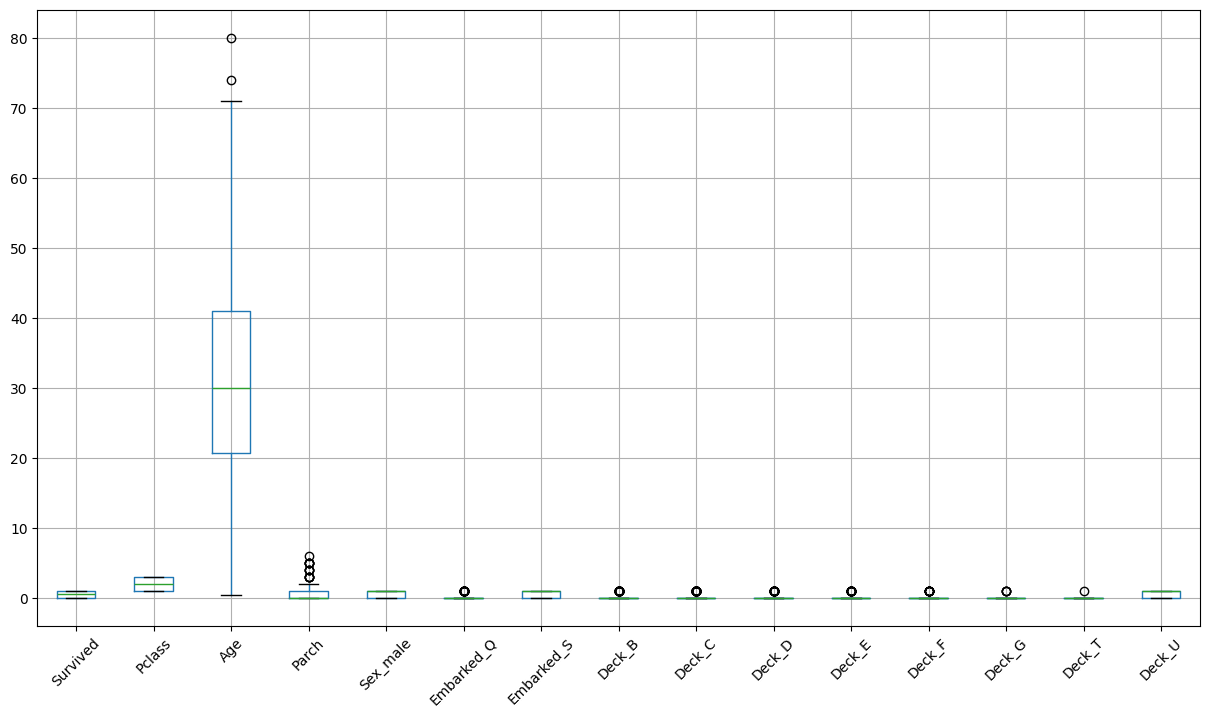

In [612]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
df.boxplot()

plt.xticks(rotation=45)


# normalization

In [613]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df) # this return a numoy array so we have to convert it back into df
df = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)

print(df)

     Survived  Pclass       Age     Parch  Sex_male  Embarked_Q  Embarked_S  \
0         0.0     1.0  0.271174  0.000000       1.0         0.0         1.0   
1         1.0     0.0  0.472229  0.000000       0.0         0.0         0.0   
2         1.0     1.0  0.321438  0.000000       0.0         0.0         1.0   
3         1.0     0.0  0.434531  0.000000       0.0         0.0         1.0   
4         0.0     1.0  0.434531  0.000000       1.0         0.0         1.0   
..        ...     ...       ...       ...       ...         ...         ...   
565       1.0     0.0  0.698417  0.166667       0.0         0.0         0.0   
566       0.0     1.0  0.484795  0.833333       0.0         1.0         0.0   
567       1.0     0.0  0.233476  0.000000       0.0         0.0         1.0   
568       1.0     0.0  0.321438  0.000000       1.0         0.0         0.0   
569       0.0     1.0  0.396833  0.000000       1.0         1.0         0.0   

     Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G

# ✂️ Splitting the Data — Notes

## Why Split the Data?
- **Training Set**: Used to train the machine learning model.
- **Test Set**: Used to evaluate the model's performance on unseen data.

---

## What is the Target Feature?
- The **target** is the column you want to predict.
- For the Titanic dataset:  
    - **Target (`y`)**: `Survived` (who survived the Titanic)

---

## What are Features (`X`) and Target (`y`)?
- **Features (`X`)**: All input columns used for prediction (e.g., Age, Sex, Pclass, etc.)
- **Target (`y`)**: The output column to predict (e.g., Survived)

---

## What are `X_train`, `X_test`, `y_train`, `y_test`?
- When splitting the data:
    - `X_train`: Features for training the model
    - `X_test`: Features for testing the model
    - `y_train`: Target values for training
    - `y_test`: Target values for testing (to compare with predictions)

---

> **Summary:**  
> Splitting ensures the model is evaluated on data it hasn't seen before, giving a realistic measure of performance.


In [614]:
#splitting data
# selecting survived as main feature , bc we have to predict that 

from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])  # input features
Y = df['Survived']                 # target feature

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [615]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7982456140350878
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        52
         1.0       0.80      0.84      0.82        62

    accuracy                           0.80       114
   macro avg       0.80      0.79      0.80       114
weighted avg       0.80      0.80      0.80       114

